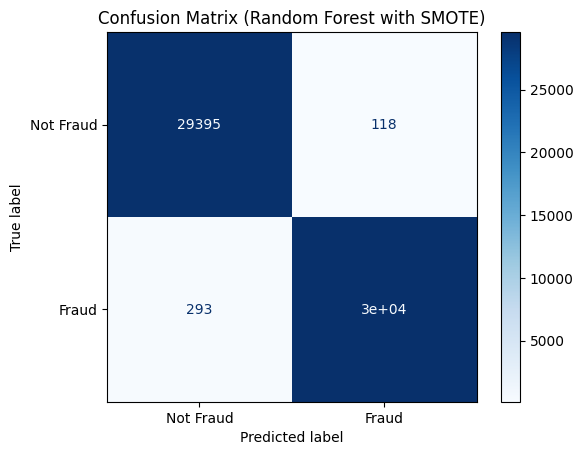

Random Forest - Accuracy Score: 0.9931
Random Forest - Precision: 0.9960
Random Forest - Recall: 0.9902
Random Forest - F1 Score: 0.9931


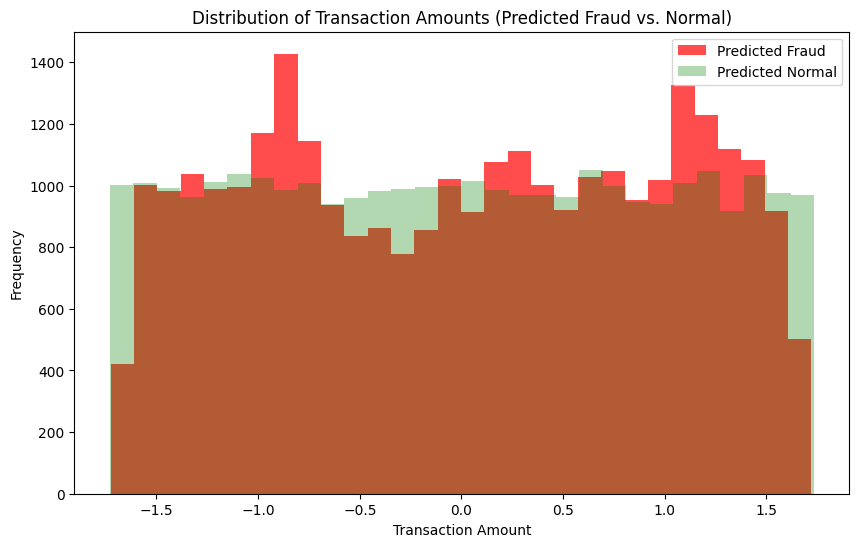

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/credit_card_fraud_dataset.csv')

# Process date and categorical features
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek

# Encode categorical columns
le_type = LabelEncoder()
df['TransactionType'] = le_type.fit_transform(df['TransactionType'])
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# Select features and target
features = ['Amount', 'MerchantID', 'TransactionType', 'Location', 'Hour', 'DayOfWeek']
X = df[features]
y = df['IsFraud'] if 'IsFraud' in df.columns else None

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random Forest with SMOTE)')
plt.show()

# Calculate and print metrics
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest - Accuracy Score: {accuracy:.4f}')
print(f'Random Forest - Precision: {precision:.4f}')
print(f'Random Forest - Recall: {recall:.4f}')
print(f'Random Forest - F1 Score: {f1:.4f}')

# Additional visualization: distribution of fraud predictions
plt.figure(figsize=(10, 6))
plt.hist(X_test[:, 0][y_pred == 1], bins=30, alpha=0.7, label='Predicted Fraud', color='red')
plt.hist(X_test[:, 0][y_pred == 0], bins=30, alpha=0.3, label='Predicted Normal', color='green')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts (Predicted Fraud vs. Normal)')
plt.legend()
plt.show()


In [ ]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

# Display the shape of the DataFrame
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionID    100000 non-null  int64         
 1   TransactionDate  100000 non-null  datetime64[ns]
 2   Amount           100000 non-null  float64       
 3   MerchantID       100000 non-null  int64         
 4   TransactionType  100000 non-null  int64         
 5   Location         100000 non-null  int64         
 6   IsFraud          100000 non-null  int64         
 7   Hour             100000 non-null  int32         
 8   DayOfWeek        100000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5)
memory usage: 6.1 MB
None

Shape of the DataFrame (rows, columns):
(100000, 9)

First few rows of the DataFrame:
   TransactionID            TransactionDate   Amount  MerchantID  \
0              1 2024

In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Display unique counts of categorical columns
print("\nUnique counts of categorical columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()} unique values")



Summary Statistics for Numerical Columns:
       TransactionID                TransactionDate         Amount  \
count  100000.000000                         100000  100000.000000   
mean    50000.500000  2024-04-21 13:06:09.973745920    2497.092666   
min         1.000000     2023-10-21 09:28:35.824439       1.050000   
25%     25000.750000  2024-01-20 23:18:20.586056704    1247.955000   
50%     50000.500000  2024-04-21 13:39:35.701438976    2496.500000   
75%     75000.250000  2024-07-21 22:28:05.702624512    3743.592500   
max    100000.000000     2024-10-21 09:20:35.961088    4999.770000   
std     28867.657797                            NaN    1442.415999   

          MerchantID  TransactionType       Location        IsFraud  \
count  100000.000000    100000.000000  100000.000000  100000.000000   
mean      501.676070         0.501310       4.485300       0.010000   
min         1.000000         0.000000       0.000000       0.000000   
25%       252.000000         0.000000     

In [ ]:
# Check for missing values in the DataFrame
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())



Missing Values in the Dataset:
TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
Hour               0
DayOfWeek          0
dtype: int64



Anomaly_Z - Accuracy: 0.9900, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000

Anomaly_MD - Accuracy: 0.9656, Precision: 0.0128, Recall: 0.0320, F1 Score: 0.0183

Anomaly_LOF - Accuracy: 0.9410, Precision: 0.0100, Recall: 0.0500, F1 Score: 0.0167

Anomaly_IF - Accuracy: 0.9410, Precision: 0.0104, Recall: 0.0520, F1 Score: 0.0173

Anomaly_SVM - Accuracy: 0.9412, Precision: 0.0116, Recall: 0.0580, F1 Score: 0.0193


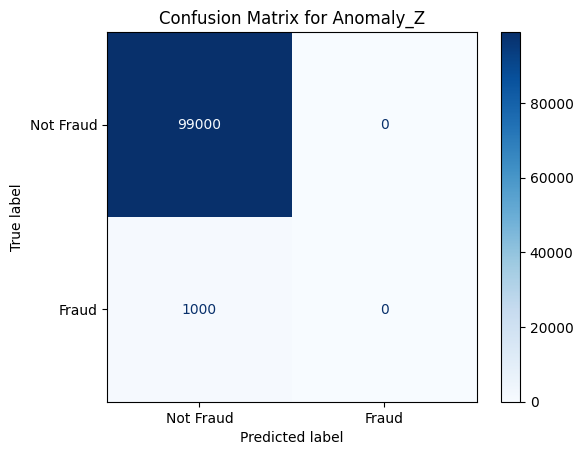

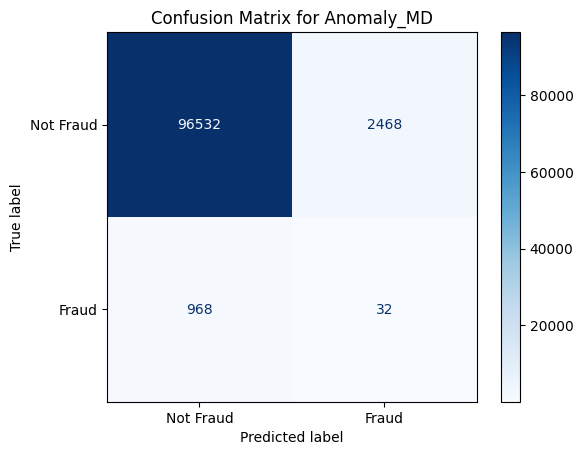

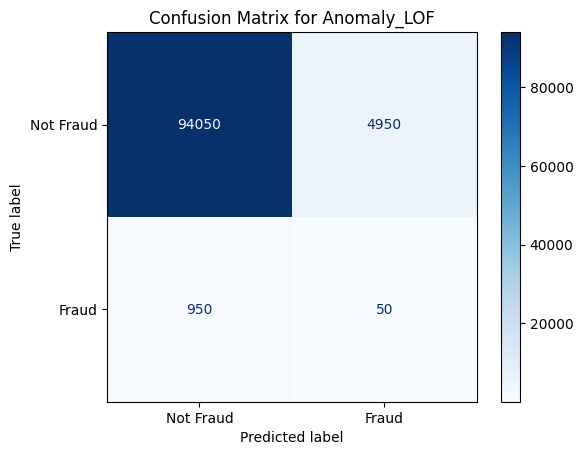

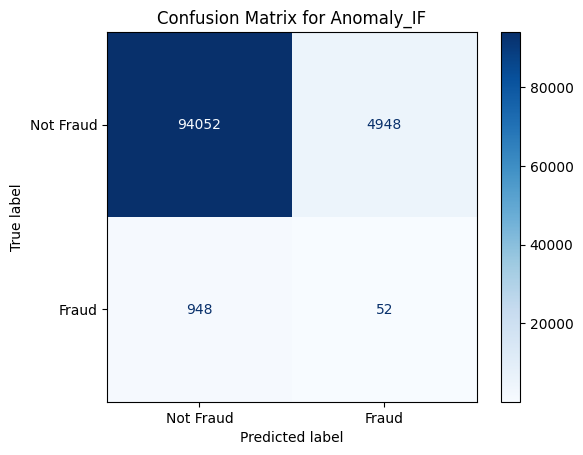

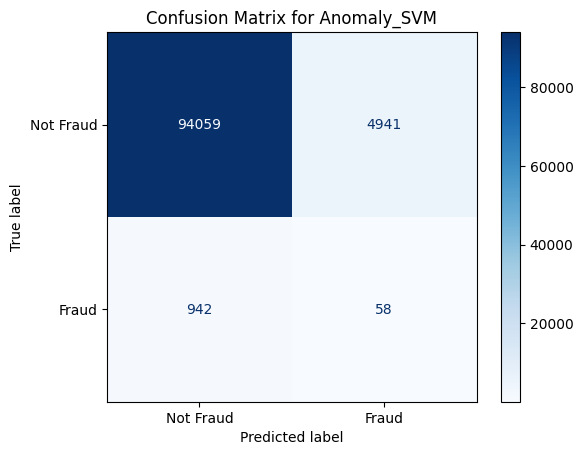

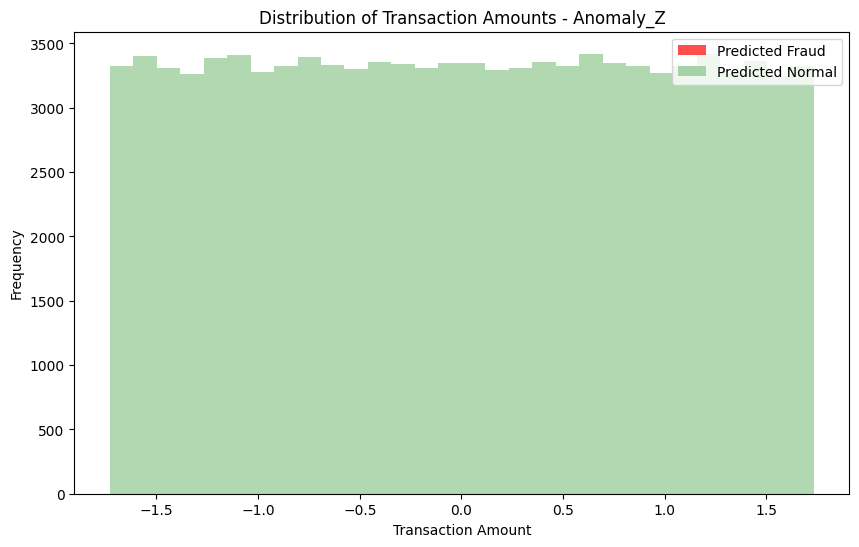

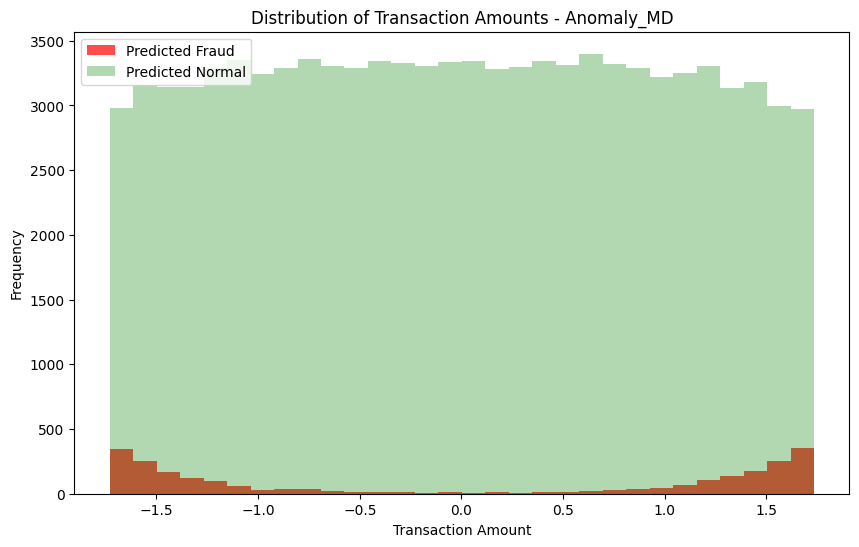

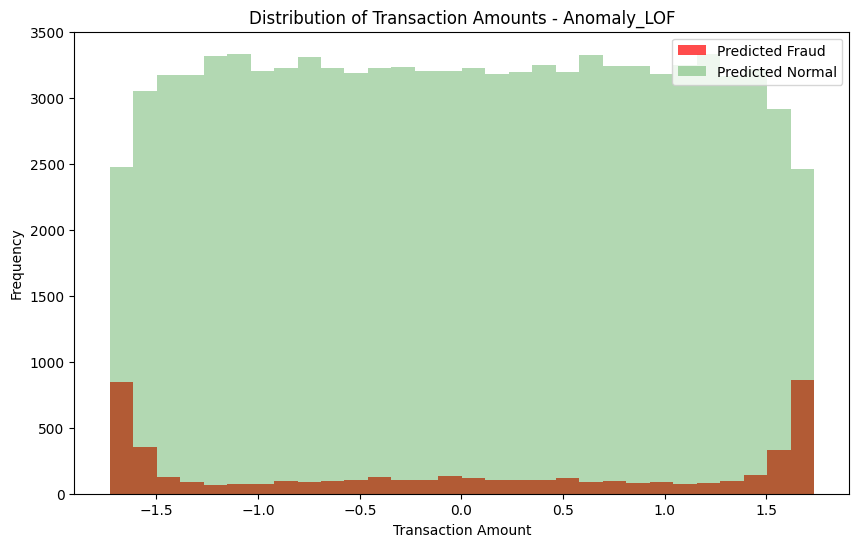

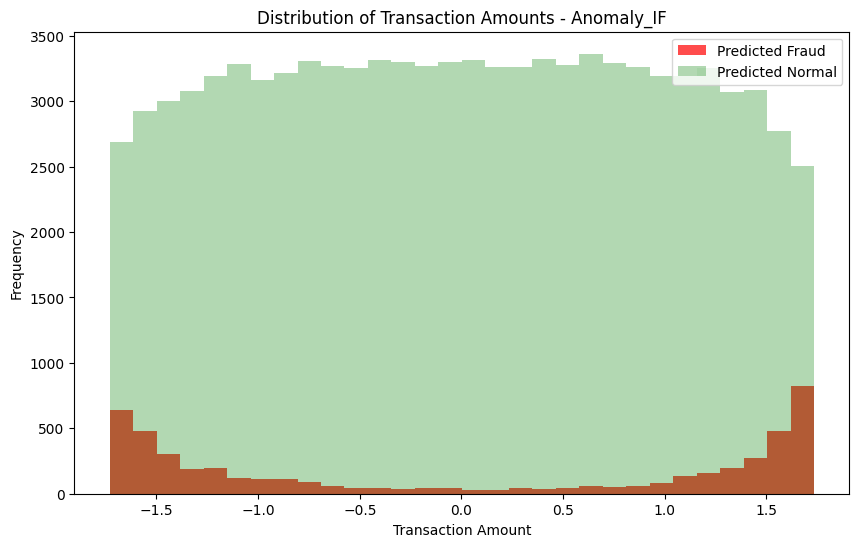

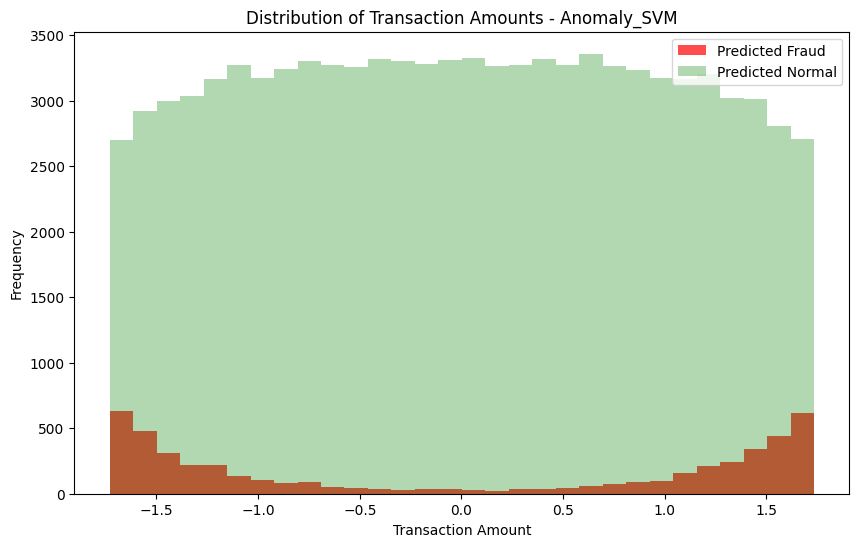


=== Anomaly Detection Methods Comparison ===
Anomaly_Z:
  Accuracy: 0.9900
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000


Anomaly_MD:
  Accuracy: 0.9656
  Precision: 0.0128
  Recall: 0.0320
  F1 Score: 0.0183


Anomaly_LOF:
  Accuracy: 0.9410
  Precision: 0.0100
  Recall: 0.0500
  F1 Score: 0.0167


Anomaly_IF:
  Accuracy: 0.9410
  Precision: 0.0104
  Recall: 0.0520
  F1 Score: 0.0173


Anomaly_SVM:
  Accuracy: 0.9412
  Precision: 0.0116
  Recall: 0.0580
  F1 Score: 0.0193




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from scipy import stats
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/credit_card_fraud_dataset.csv')

# Process date and categorical features
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek

# Encode categorical columns
le_type = LabelEncoder()
df['TransactionType'] = le_type.fit_transform(df['TransactionType'])
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# Select features and target
features = ['Amount', 'MerchantID', 'TransactionType', 'Location', 'Hour', 'DayOfWeek']
X = df[features]
y = df['IsFraud']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Z-Score Anomaly Detection
z_scores = np.abs(stats.zscore(X_scaled))
threshold_z = 3
outliers_zscore = (z_scores > threshold_z).any(axis=1)
df['Anomaly_Z'] = outliers_zscore

# Mahalanobis Distance Anomaly Detection
mean = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_distances = [mahalanobis(x, mean, inv_cov_matrix) for x in X_scaled]
threshold_md = np.percentile(mahalanobis_distances, 97.5)
outliers_mahalanobis = np.array(mahalanobis_distances) > threshold_md
df['Anomaly_MD'] = outliers_mahalanobis

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(X_scaled)
df['Anomaly_LOF'] = outliers_lof == -1

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_iforest = iso_forest.fit_predict(X_scaled)
df['Anomaly_IF'] = outliers_iforest == -1

# One-Class SVM
svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
outliers_svm = svm.fit_predict(X_scaled)
df['Anomaly_SVM'] = outliers_svm == -1

# Evaluation Metrics for Each Method
methods = ['Anomaly_Z', 'Anomaly_MD', 'Anomaly_LOF', 'Anomaly_IF', 'Anomaly_SVM']
results = {}
for method in methods:
    y_pred = df[method].astype(int)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    results[method] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"\n{method} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Visualize Confusion Matrices
for method in methods:
    y_pred = df[method].astype(int)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {method}')
    plt.show()

# Visualization of Anomaly Distribution by Method
for method in methods:
    plt.figure(figsize=(10, 6))
    plt.hist(X_scaled[:, 0][df[method] == 1], bins=30, alpha=0.7, label='Predicted Fraud', color='red')
    plt.hist(X_scaled[:, 0][df[method] == 0], bins=30, alpha=0.3, label='Predicted Normal', color='green')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Transaction Amounts - {method}')
    plt.legend()
    plt.show()

# Final Summary of Results
print("\n=== Anomaly Detection Methods Comparison ===")
for method, metrics in results.items():
    print(f"{method}:")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.4f}")
    print("\n")


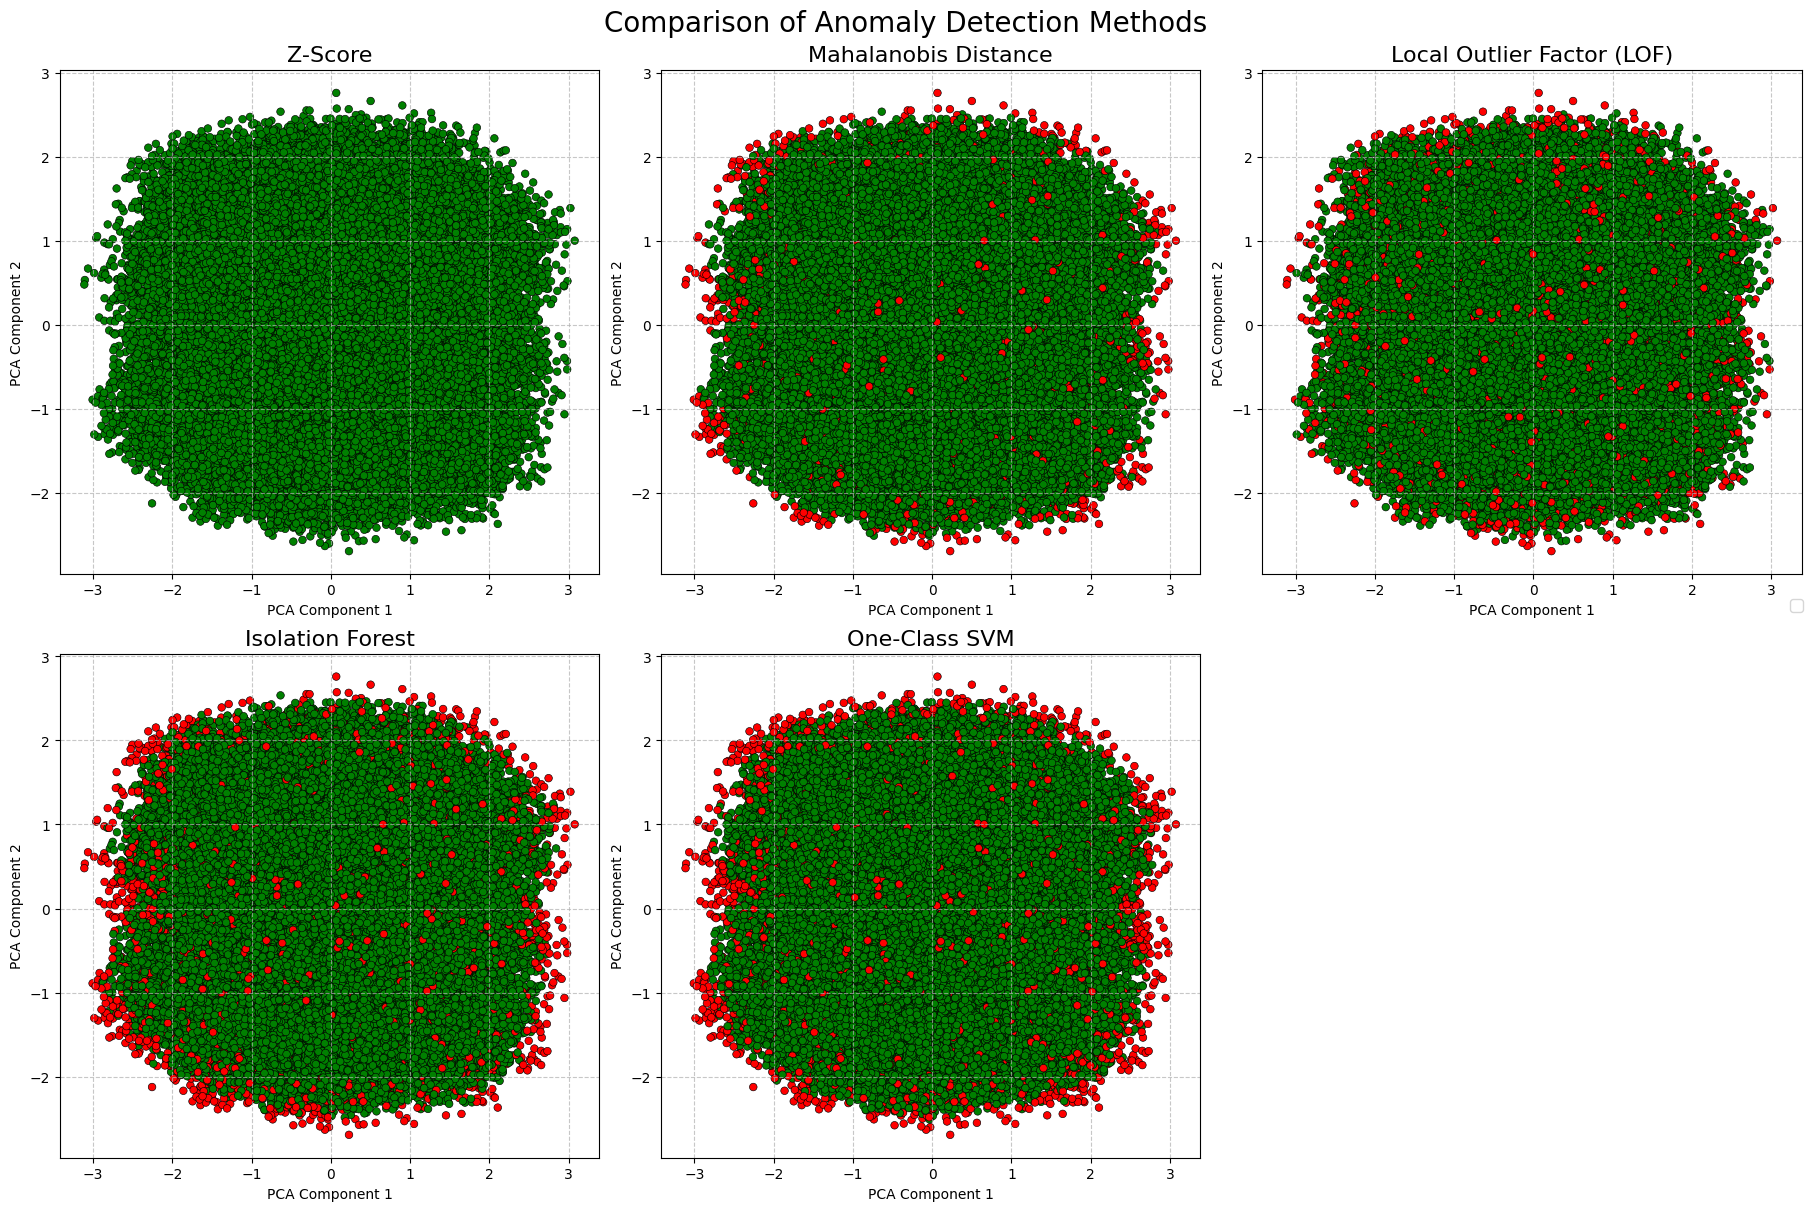

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce data to two dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a figure with subplots for each method
fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
fig.suptitle('Comparison of Anomaly Detection Methods', fontsize=20)

# Dictionary to store the method names and the respective anomaly column
methods = {
    "Z-Score": "Anomaly_Z",
    "Mahalanobis Distance": "Anomaly_MD",
    "Local Outlier Factor (LOF)": "Anomaly_LOF",
    "Isolation Forest": "Anomaly_IF",
    "One-Class SVM": "Anomaly_SVM"
}

# Function to plot anomalies for each method
def plot_method(ax, method_name, anomaly_column):
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1],
        hue=df[anomaly_column],
        palette={0: "green", 1: "red"},
        marker="o", edgecolor="k", s=30,
        ax=ax, legend=False
    )
    ax.set_title(f"{method_name}", fontsize=16)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.grid(True, linestyle='--', alpha=0.7)

# Plot each method's result in a subplot
for idx, (method_name, anomaly_column) in enumerate(methods.items()):
    ax = axes[idx // 3, idx % 3]  # Determine position in the subplot grid
    plot_method(ax, method_name, anomaly_column)

# Remove the last empty subplot
fig.delaxes(axes[1, 2])

# Add a legend to the figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['Normal', 'Anomaly'], loc="center right", fontsize=12)

plt.show()
